# Демонстрация базовых возможностей класса TouchstoneData




Сначала необходимо загрузить библиотеку **MWLab** с [GitHub](https://github.com/IztvAV/mwlab).

In [1]:
import sys
from IPython.display import clear_output

!git clone https://github.com/IztvAV/mwlab.git git_mwlab
clear_output()

sys.path.append("/content/git_mwlab")

Библиотека **MWLab** использует некоторые возможности пакета с открытым исходным кодом — [scikit-rf](https://scikit-rf.org/), а также библиотеки **PyTorch Lightning**. Поэтому перед началом работы с **MWLab** необходимо также установить **scikit-rf** и **PyTorch Lightning**.

In [2]:
!pip install scikit-rf
clear_output()

import skrf as rf

In [3]:
# PyTorch Lightning
try:
    import lightning as L
except ModuleNotFoundError:  # В Google Colab PyTorch Lightning не установлен по умолчанию. Устанавливаем его при необходимости.
    !pip install lightning
    import lightning as L

clear_output()

In [4]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import json

In [5]:
from mwlab import TouchstoneData

Воспользуемся готовым примером Touchstone-файла из библиотеки **MWLab**.  
Файл `Sprms.s2p` был получен в CST Studio и содержит:

- параметры электромагнитной модели СВЧ-фильтра 12-го порядка (указаны в заголовке файла),
- рассчитанные S-параметры в заданном частотном диапазоне.



In [6]:
EXAMPLE = "/content/git_mwlab/examples/01_io/Sprms.s2p"

## 1 Чтение готового Touchstone-файла


In [7]:
ts = TouchstoneData.load(EXAMPLE)

print("------ Исходный файл -------")
print("Путь к файлу:               ", ts.path)
print("Параметры модели:           ", ts.params)
print("Количество значений частоты:", len(ts.network.f), "\n")

------ Исходный файл -------
Путь к файлу:                /content/git_mwlab/examples/01_io/Sprms.s2p
Параметры модели:            {'cavity_h': 16.0, 'cavity_l0': 10.0, 'cavity_l1': 15.2223, 'cavity_l2': 16.8534, 'cavity_l3': 17.1243, 'cavity_l4': 17.257, 'cavity_l5': 17.1229, 'cavity_l6': 17.5688, 'cavity_r': 2.5, 'cavity_screw_l': 0.5, 'cavity_screw_r': 1.5, 'cavity_w': 8.0, 'iris_h00': 0.0, 'iris_h01': 8.8082, 'iris_h112': 0.0, 'iris_h12': 5.6076, 'iris_h211': 3.6561, 'iris_h23': 5.2047, 'iris_h310': 3.9794, 'iris_h34': 5.0897, 'iris_h45': 4.9215, 'iris_h49': 4.618, 'iris_h56': 4.8019, 'iris_h58': 4.4341, 'iris_h67': 6.5748, 'iris_rx': 0.1, 'iris_screw_l': 0.5, 'iris_screw_r': 1.5, 'iris_shift00': 0.0, 'iris_shift112': 0.0, 'iris_shift211': 3.5, 'iris_shift310': 0.0, 'iris_shift49': 0.0, 'iris_shift58': 3.5, 'iris_shift67': 3.5, 'iris_tx': 4.5, 'iris_tz': 4.5, 'iris_w00': 0.0, 'iris_w112': 0.0, 'iris_w211': 4.0, 'iris_w310': 3.9794, 'iris_w49': 4.618, 'iris_w58': 4.0, 'iris_w67': 4.

Объект `TouchstoneData.network` позволяет удобно визуализировать данные из Touchstone-файла,  
например, строить графики частотной зависимости S-параметров в децибелах.


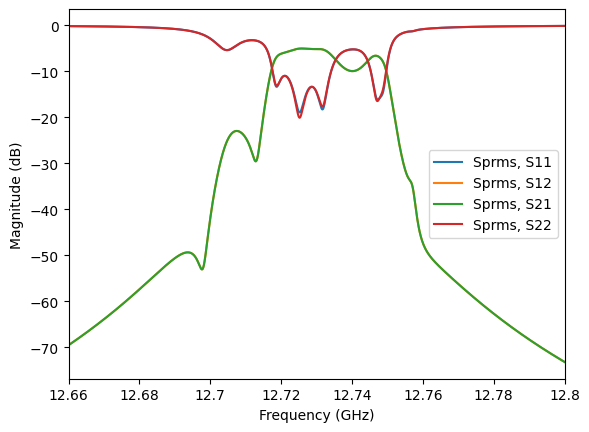

In [8]:
# Построение S-параметров в логарифмическом масштабе (dB)
ts.network.plot_s_db()

Объект `TouchstoneData.network` предоставляет доступ ко всем данным Touchstone-файла, включая матрицу S-параметров и вектор частот.  
С его помощью можно гибко выбирать нужные параметры (например, только S11 или S21), а также настраивать формат отображения графиков в соответствии с задачами анализа.

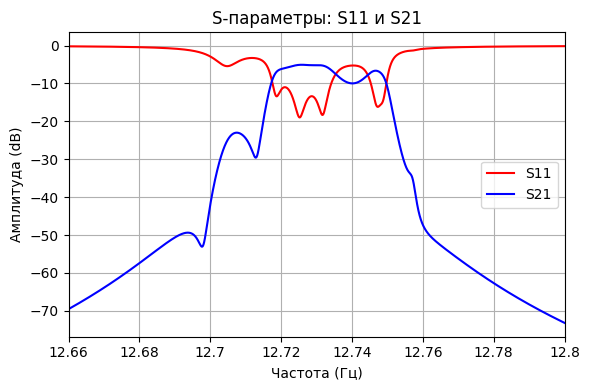

In [9]:
plt.figure(figsize=(6, 4))
ts.network.plot_s_db(m=0, n=0, color='r', label='S11')
ts.network.plot_s_db(m=1, n=0, color='b', label='S21')
plt.title("S-параметры: S11 и S21")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда (dB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2 Обновление параметров и сохранение в файл


Параметры электромагнитной модели СВЧ-устройства хранятся в словаре `TouchstoneData.params`.  
Следующий пример демонстрирует, как получить доступ к этим параметрам, внести изменения и сохранить обновленные данные обратно в Touchstone-файл с помощью объекта класса `TouchstoneData`.

In [10]:
# ts.params — это словарь параметров электромагнитной модели
first_param = list(ts.params.keys())[0]      # Получаем название первого параметра
first_value = ts.params[first_param]         # Получаем его значение

# Выводим первый параметр и его значение
print(f"Первый параметр: {first_param}, значение: {first_value}\n")

# Увеличим значение этого параметра в 2 раза
ts.params[first_param] = first_value * 2

# Добавим новый параметр в словарь
ts.params["XYZ"] = 5.555

# Сохраним внесённые изменения в новый файл
ts.save("Sprms_mod.s2p")  # новая строка Parameters будет записана в файл "Sprms_mod.s2p"

Первый параметр: cavity_h, значение: 16.0



На этом этапе можно заново загрузить файл `Sprms_mod.s2p` и проверить, что все изменения параметров были успешно сохранены.

In [11]:
ts2 = TouchstoneData.load("Sprms_mod.s2p")

print("--- Модифицированный файл ---")
print("Путь к файлу:     ", ts2.path)
print("Параметры модели:\n", json.dumps(ts2.params, indent=2))

--- Модифицированный файл ---
Путь к файлу:      Sprms_mod.s2p
Параметры модели:
 {
  "cavity_h": 32.0,
  "cavity_l0": 10.0,
  "cavity_l1": 15.2223,
  "cavity_l2": 16.8534,
  "cavity_l3": 17.1243,
  "cavity_l4": 17.257,
  "cavity_l5": 17.1229,
  "cavity_l6": 17.5688,
  "cavity_r": 2.5,
  "cavity_screw_l": 0.5,
  "cavity_screw_r": 1.5,
  "cavity_w": 8.0,
  "iris_h00": 0.0,
  "iris_h01": 8.8082,
  "iris_h112": 0.0,
  "iris_h12": 5.6076,
  "iris_h211": 3.6561,
  "iris_h23": 5.2047,
  "iris_h310": 3.9794,
  "iris_h34": 5.0897,
  "iris_h45": 4.9215,
  "iris_h49": 4.618,
  "iris_h56": 4.8019,
  "iris_h58": 4.4341,
  "iris_h67": 6.5748,
  "iris_rx": 0.1,
  "iris_screw_l": 0.5,
  "iris_screw_r": 1.5,
  "iris_shift00": 0.0,
  "iris_shift112": 0.0,
  "iris_shift211": 3.5,
  "iris_shift310": 0.0,
  "iris_shift49": 0.0,
  "iris_shift58": 3.5,
  "iris_shift67": 3.5,
  "iris_tx": 4.5,
  "iris_tz": 4.5,
  "iris_w00": 0.0,
  "iris_w112": 0.0,
  "iris_w211": 4.0,
  "iris_w310": 3.9794,
  "iris_w49": 4.

## 3 Создание TouchstoneData «с нуля» и сохранение в файл


Объекты класса `TouchstoneData` можно создавать не только через загрузку существующего Touchstone-файла, но и **вручную**, с нуля — на основе собственных данных пользователя.

Кроме того, `TouchstoneData` предоставляет удобный интерфейс для **сохранения этих данных** в формате Touchstone.  

Следующий "игрушечный" пример демонстрирует, как это можно сделать.


In [12]:
print("\n------ Создаем TouchstoneData «с нуля» ------")

# Частотный диапазон: от 2 до 4 ГГц, 201 точка
freq = rf.Frequency(2, 4, 201, unit="GHz")

# Инициализируем массив комплексных S-параметров: (частота, порт, порт)
s = np.zeros((201, 2, 2), dtype=np.complex64)

# Примерные значения S-параметров (для симметричного двухпортового фильтра)
s[:, 0, 0] = 10 ** (-15 / 20) * np.exp(1j * 0)     # S11 = -15 дБ
s[:, 1, 1] = 10 ** (-15 / 20) * np.exp(1j * 0)     # S22 = -15 дБ
s[:, 1, 0] = 10 ** (-2 / 20)  * np.exp(1j * np.pi) # S21 = -2 дБ, с фазовым сдвигом
s[:, 0, 1] = 10 ** (-2 / 20)  * np.exp(1j * np.pi) # S12 = -2 дБ, с фазовым сдвигом

# Создаем объект Network
net = rf.Network(frequency=freq, s=s, z0=50)

# Создаем TouchstoneData с произвольными параметрами
ts_new = TouchstoneData(
    network=net,
    params={"filter_order": 3, "fc": 3.0, "Q": 50.0},
)

# Сохраняем файл
ts_new.save("my_synth.s2p")
print("Создан файл my_synth.s2p с параметрами:\n", json.dumps(ts_new.params, indent=2))



------ Создаем TouchstoneData «с нуля» ------
Создан файл my_synth.s2p с параметрами:
 {
  "filter_order": 3,
  "fc": 3.0,
  "Q": 50.0
}


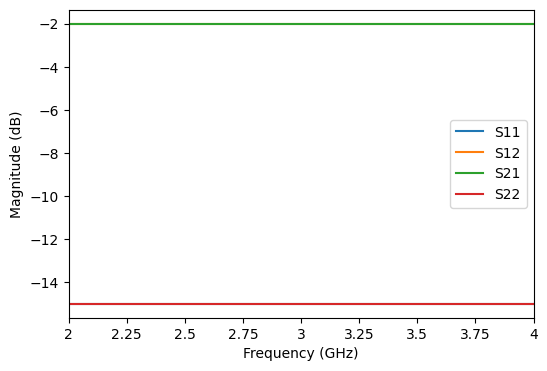

In [13]:
# Визуализируем S-параметры
plt.figure(figsize=(6, 4))
ts_new.network.plot_s_db()
